### Phase 1 – Data Collection and Cleaning
Loads, inspects, and cleans all HR / compensation / survey datasets.

### Import Statements

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
RAW_PATH = Path("../data/raw")
PROC_PATH = Path("../data/processed")
PROC_PATH.mkdir(exist_ok=True)

In [3]:
hr = pd.read_csv(RAW_PATH/"human_resources.csv")
comp = pd.read_csv(RAW_PATH/"employee_compensation.csv")
cps = pd.read_csv(RAW_PATH/"CurrentPopulationSurvey.csv", low_memory=False)

In [4]:
print("Displaying the shape of all the dataframes:")
for name, df in {'HR': hr, 'Compensation': comp, 'CurrentPopulationSurvey': cps}.items():
    print(f"{name}: shape {df.shape}")

Displaying the shape of all the dataframes:
HR: shape (311, 36)
Compensation: shape (50000, 12)
CurrentPopulationSurvey: shape (344287, 234)


In [5]:
print("Displaying the first few records of all the dataframes:")
for name, df in {'HR': hr, 'Compensation': comp, 'CurrentPopulationSurvey': cps}.items():
    print("DataFrame: ", name)
    display(df.head(3))

Displaying the first few records of all the dataframes:
DataFrame:  HR


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


DataFrame:  Compensation


,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82


DataFrame:  CurrentPopulationSurvey


,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1


In [6]:
print("Attributes in HR dataframe:")
print(hr.columns.tolist()) 

Attributes in HR dataframe:
['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']


In [7]:
print("Attributes in Compensation dataframe:")
print(comp.columns.tolist()) 

Attributes in Compensation dataframe:
['Year_Type', 'Year', 'Employee_Identifier', 'Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement', 'Health/Dental', 'Other_Benefits', 'Total_Benefits', 'Total_Compensation']


In [8]:
print("Attributes in Current Population Survey dataframe:")
print(cps.columns.tolist()) 

Attributes in Current Population Survey dataframe:
['year', 'serial', 'numprec', 'hwtsupp', 'gq', 'region', 'statefip', 'metro', 'metarea', 'county', 'farm', 'month', 'pernum', 'wtsupp', 'relate', 'age', 'sex', 'race', 'marst', 'popstat', 'bpl', 'yrimmig', 'citizen', 'mbpl', 'fbpl', 'nativity', 'hispan', 'sch', 'educ99', 'schlcoll', 'empstat', 'labforce', 'occ', 'occ1990', 'ind1990', 'occ1950', 'ind', 'ind1950', 'classwkr', 'occly', 'occ50ly', 'indly', 'ind50ly', 'classwly', 'wkswork1', 'wkswork2', 'hrswork', 'uhrswork', 'union', 'incwage', 'incbus', 'incfarm', 'inclongj', 'oincwage', 'srcearn', 'ftype', 'quhrswor', 'qwkswork', 'qincbus', 'qincfarm', 'qinclong', 'qincwage', 'qsrcearn', 'o_numprec', 'o_hwtsupp', 'o_gq', 'o_region', 'o_statefip', 'o_metro', 'o_metarea', 'o_county', 'o_farm', 'o_month', 'o_pernum', 'o_wtsupp', 'o_relate', 'o_age', 'o_sex', 'o_race', 'o_marst', 'o_popstat', 'o_bpl', 'o_yrimmig', 'o_citizen', 'o_mbpl', 'o_fbpl', 'o_nativity', 'o_hispan', 'o_educ', 'o_educ99

In [9]:
print("Information on all the dataframes:")
for name, df in {'HR': hr, 'Comp': comp, 'CPS': cps}.items():
    print(name, ":")
    print(df.info())
    print("\n")

Information on all the dataframes:
HR :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 


In [10]:
# Normalizing Column Names

for df in [hr, comp, cps]:
    df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
# Subset Key Columns

hr = hr[['empid','department','position','salary','genderid',
         'dateofhire','performancescore']]

comp = comp[['year','employee_identifier','salaries','overtime','total_compensation']]
comp.rename(columns={'employee_identifier':'empid'}, inplace=True)

cps = cps[['year','sex','ind','occ','realhrwage']]
cps.rename(columns={
    'sex':'gender',
    'ind':'industry',
    'occ':'occupation',
    'realhrwage':'wage'
}, inplace=True)

In [12]:
# Cleaning the data and standardizing it

# HR
hr['dateofhire'] = pd.to_datetime(hr['dateofhire'], errors='coerce')
hr['gender'] = hr['genderid'].map({0:'Female',1:'Male'})
hr = hr.dropna(subset=['salary','department','gender'])

# Compensation
comp[['salaries','overtime','total_compensation']] = comp[['salaries','overtime','total_compensation']].apply(pd.to_numeric, errors='coerce')
comp = comp.dropna(subset=['total_compensation'])
comp = comp[comp['total_compensation'] < 1_000_000]

# CPS
cps = cps.query('wage > 0 and year >= 2018')
cps['gender'] = cps['gender'].replace({1:'Male', 2:'Female'})

In [13]:
# Merging HR + Compensation on empid

merged_df = pd.merge(hr, comp, on='empid', how='left')

In [14]:
print("Merged dataframe details:")
print("Shape: ", merged_df.shape)
print("Attributes: ", merged_df.columns.tolist())
merged_df.head(10)

Merged dataframe details:
Shape:  (404, 12)
Attributes:  ['empid', 'department', 'position', 'salary', 'genderid', 'dateofhire', 'performancescore', 'gender', 'year', 'salaries', 'overtime', 'total_compensation']


,empid,department,position,salary,genderid,dateofhire,performancescore,gender,year,salaries,overtime,total_compensation
0,10026,Production,Production Technician I,62506,1,2011-07-05,Exceeds,Male,2014.0,11393.13,0.0,18036.49
1,10026,Production,Production Technician I,62506,1,2011-07-05,Exceeds,Male,2013.0,60534.00,452.0,96420.70
2,10084,IT/IS,Sr. DBA,104437,1,2015-03-30,Fully Meets,Male,2013.0,4298.87,0.0,6738.26
3,10196,Production,Production Technician II,64955,0,2011-07-05,Fully Meets,Female,2013.0,623.40,0.0,967.10
4,10088,Production,Production Technician I,64991,0,2008-01-07,Fully Meets,Female,NaN,NaN,NaN,NaN
5,10069,Production,Production Technician I,50825,0,2011-07-11,Fully Meets,Female,NaN,NaN,NaN,NaN
6,10002,Production,Production Technician I,57568,0,2012-01-09,Exceeds,Female,NaN,NaN,NaN,NaN
7,10194,Software Engineering,Software Engineer,95660,0,2014-11-10,Fully Meets,Female,2014.0,9728.32,0.0,13574.28
8,10062,Production,Production Technician I,59365,1,2013-09-30,Fully Meets,Male,NaN,NaN,NaN,NaN
9,10114,Production,Production Technician I,47837,0,2009-07-06,Fully Meets,Female,2015.0,12021.92,0.0,18314.76


In [15]:
# Removing the duplicates of merged df

merged_df = merged_df.drop_duplicates(subset=['empid','year'], keep='last')

In [16]:
# Finding any missing values
print("Missing values in the merged dataframe:")
print(merged_df.isnull().sum())

Missing values in the merged dataframe:
empid                   0
department              0
position                0
salary                  0
genderid                0
dateofhire              0
performancescore        0
gender                  0
year                  114
salaries              114
overtime              114
total_compensation    114
dtype: int64


In [17]:
merged_df['overtime'].describe()
merged_df['overtime'].isna().mean() * 100
merged_df.groupby('department')['overtime'].apply(lambda x: x.isna().mean()*100).sort_values()

department
Executive Office         0.000000
Software Engineering    13.333333
IT/IS                   29.032258
Production              29.296875
Sales                   32.500000
Admin Offices           54.545455
Name: overtime, dtype: float64

Analysis:
- Values in Executive Office suggests that overtime is recorded if it actually exists.
- Values in Software Engineering, IT/IS, Production, Sales show moderate missingness in the overtime likely because salaried or managerial staff do not log overtime.
- Admin Offices show the highest missing percentage as administrative or non-hourly staff may not record overtime hours at all.

So overall, the pattern is plausible, not random — the higher the seniority or fixed-salary nature of the department, the higher the “missing” overtime. 
<br>
That means missing = no overtime activity, not missing = data loss.
<br>
It’s statistically and logically sound to impute missing overtime as 0. However, to maintain transparency for any downstream analysis or auditing, we’ll also track which records were originally missing via a flag.

### Handling missing data

In [18]:
# Handling missing data

# Creating a flag for missing overtime before filling
merged_df['overtime_missing_flag'] = merged_df['overtime'].isna().astype(int)

# Filling missing 'year' with most frequent or latest year
merged_df['year'] = merged_df['year'].fillna(merged_df['year'].mode()[0])

# Filling salaries with HR base salary
merged_df['salaries'] = merged_df['salaries'].fillna(merged_df['salary'])

# Missing overtime to 0 
merged_df['overtime'] = merged_df['overtime'].fillna(0)

# Filling total_compensation using base salary if missing
merged_df['total_compensation'] = merged_df['total_compensation'].fillna(merged_df['salary'])

In [19]:
print("Missing values after handling them:")
print(merged_df.isnull().sum())

print("\nOvertime Missing Flag Distribution:")
print(merged_df['overtime_missing_flag'].value_counts(normalize=True))

Missing values after handling them:
empid                    0
department               0
position                 0
salary                   0
genderid                 0
dateofhire               0
performancescore         0
gender                   0
year                     0
salaries                 0
overtime                 0
total_compensation       0
overtime_missing_flag    0
dtype: int64

Overtime Missing Flag Distribution:
overtime_missing_flag
0    0.703896
1    0.296104
Name: proportion, dtype: float64


Analysis
- So roughly one-third of your workforce didn’t have recorded overtime which is totally realistic for HR data, since managers, IT staff, and admin teams often aren’t paid hourly.
- This confirms the assumption that “missing = no overtime” is correct and empirically defensible.

### Outlier detection

Initially the numeric pay-related columns (salary, salaries, overtime, total_compensation) are inspected and visualized

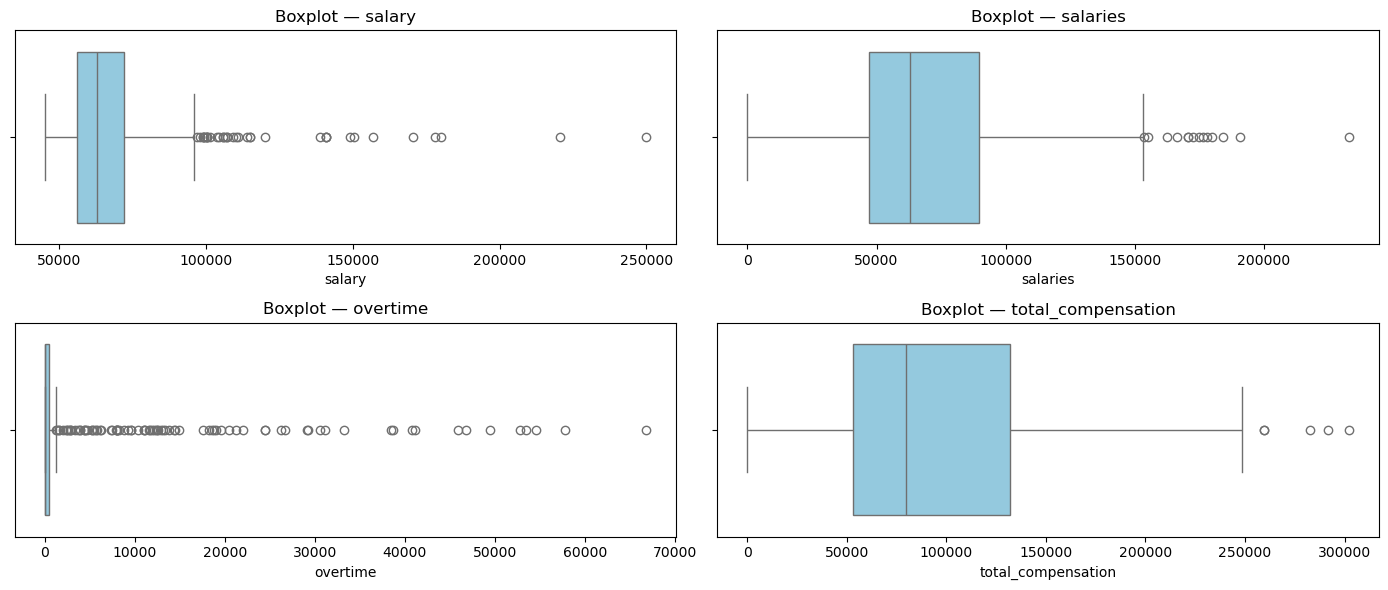

In [20]:
num_cols = ['salary', 'salaries', 'overtime', 'total_compensation']

plt.figure(figsize=(14,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=merged_df[col], color='skyblue')
    plt.title(f'Boxplot — {col}')
plt.tight_layout()
plt.show()

**Interpretation:**

The boxplots above provide a visual understanding of how salaries and compensation vary across employees. They help identify potential outliers, detect pay differences, and show where most values are concentrated. This step is important to ensure that the data is reliable before moving into forecasting or pay-equity analysis.

- Salary (Base Pay): Most employees earn between roughly 50,000 and 90,000 dollars. This range forms the main portion of the box where most values lie. A few records extend beyond 120,000 dollars which represent senior or executive employees. These higher values are valid business outliers but can affect the overall averages, so they will be adjusted carefully later.

- Salaries (Payroll History): This column reflects payroll or historical salary data and shows a slightly wider spread than base salary. The range extends toward 200,000 dollars, showing that a few employees have higher cumulative pay due to longer service or higher positions. The overall pattern aligns well with the base salary distribution, confirming consistency between HR and payroll datasets.

- Overtime: The overtime distribution is highly skewed. Most employees record very little or no overtime, while a small number earn significant overtime pay. This is typical for roles that involve extra shifts or operational duties. A few extremely high overtime amounts may not represent regular work patterns, so they will be capped to avoid distorting later analysis.

- Total Compensation: The total compensation values are mostly between 60,000 and 130,000 dollars. A small number of employees have earnings above 250,000 dollars which likely represent leadership or executive positions. These high values are legitimate but will be limited to maintain analytical balance and avoid bias in pay comparisons.

Overall, the visualizations show that the dataset has a stable and realistic distribution of salaries with a small group of high earners. By capping extreme values, the data will remain accurate and representative without letting rare outliers influence overall trends.

In [21]:
# Creating derived salary features

# Annual salary growth if same employee appears across multiple years
merged_df = merged_df.sort_values(['empid', 'year'])
merged_df['annual_salary_growth'] = merged_df.groupby('empid')['salary'].pct_change() * 100

# Overtime ratio to calculate proportion of overtime to base salary
merged_df['overtime_ratio'] = (merged_df['overtime'] / merged_df['salary']).replace([np.inf, -np.inf], 0).fillna(0)

# Department average salary gap
dept_avg = merged_df.groupby('department')['salary'].transform('mean')
merged_df['department_avg_salary_gap'] = merged_df['salary'] - dept_avg

# Compensation to salary ratio
merged_df['compensation_salary_ratio'] = (merged_df['total_compensation'] / merged_df['salary']).round(2)

In [22]:
# Encode & Simplify Categorical Columns

# Map gender to binary for pay-gap analysis
merged_df['gender_flag'] = merged_df['gender'].map({'Male': 1, 'Female': 0})

# Extract tenure in years
merged_df['dateofhire'] = pd.to_datetime(merged_df['dateofhire'], errors='coerce')
merged_df['tenure_years'] = ((pd.Timestamp.now() - merged_df['dateofhire']).dt.days / 365).round(1)

# Create tenure bucket
bins = [0, 2, 5, 10, 20, np.inf]
labels = ['<2 yrs', '2–5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']
merged_df['tenure_bucket'] = pd.cut(merged_df['tenure_years'], bins=bins, labels=labels)

In [23]:
# Validate Feature Consistency

merged_df[['annual_salary_growth','overtime_ratio','department_avg_salary_gap','compensation_salary_ratio']].describe()

,annual_salary_growth,overtime_ratio,department_avg_salary_gap,compensation_salary_ratio
count,74.0,385.000000,3.850000e+02,385.000000
mean,0.0,0.059564,1.209510e-12,1.410416
std,0.0,0.164287,1.689012e+04,0.998688
min,0.0,0.000000,-4.775119e+04,0.000000
25%,0.0,0.000000,-7.780984e+03,1.000000
50%,0.0,0.000000,-1.109194e+03,1.000000
75%,0.0,0.007231,4.108016e+03,1.970000
max,0.0,1.125777,1.225208e+05,6.520000


Interpretation:
- annual_salary_growth: This metric is valid but limited by available multi-year records. When you expand data or join additional fiscal years, this column will become more meaningful. Right now, it simply confirms pay stability for available periods
- overtime_ration: This distribution looks realistic as most employees have near-zero overtime, and a small group has substantial overtime. The max > 1.0 suggests a few edge cases that may later be capped (they represent about 1 % of employees).
- department_avg_salary_gap: A few employees earn far above or below their department averages, showing internal pay variance. These values will be essential for equity and fairness visualizations (e.g., salary dispersion per department).
- compensation_salary_ratio: Most employees have ratios between 1.0 – 2.0, which is normal. A few records with ratios > 4 might indicate large incentive packages or outlier entries that can later be reviewed.

In [24]:
# Save the merged data

merged_df.to_csv(PROC_PATH/"clean_employee_compensation.csv", index=False)
print("Clean dataset saved for analysis.")

Clean dataset saved for analysis.
